# PyTorch Workflow

In [ ]:
import torch
from torch import nn # contains all of PyTorch's building blocks for neural network
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)

Data can be anything in ML

* Excel spreadsheet
* Images of any kind
* Videos
* Audios
* DNA
* Text

ML consists of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, we'll use linear regression formula to make a straight line with **known parameters**.

In [ ]:
# create known parameter
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight + bias * X

X, y, len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.7000],
         [0.7060],
         [

### Splitting the data into training and test sets (most IMP topic in ML in general)

In [ ]:
# create train/test split

train_split = int(0.8 * len(X))

x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

len(x_test), len(y_test), len(x_train), len(y_train)

(10, 10, 40, 40)

In [ ]:
def plot_prediction(train_data = x_train,
                    train_labels = y_train,
                    test_data = x_test,
                    test_labels = y_test,
                    prediction = None):

    plt.figure(figsize = (10, 10))

    # plot the training data in blue
    plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

    # plot the test data in green
    plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")


    if prediction is not None:
        plt.scatter(test_data, prediction, c = "r", s = 4, label = "Prediction")


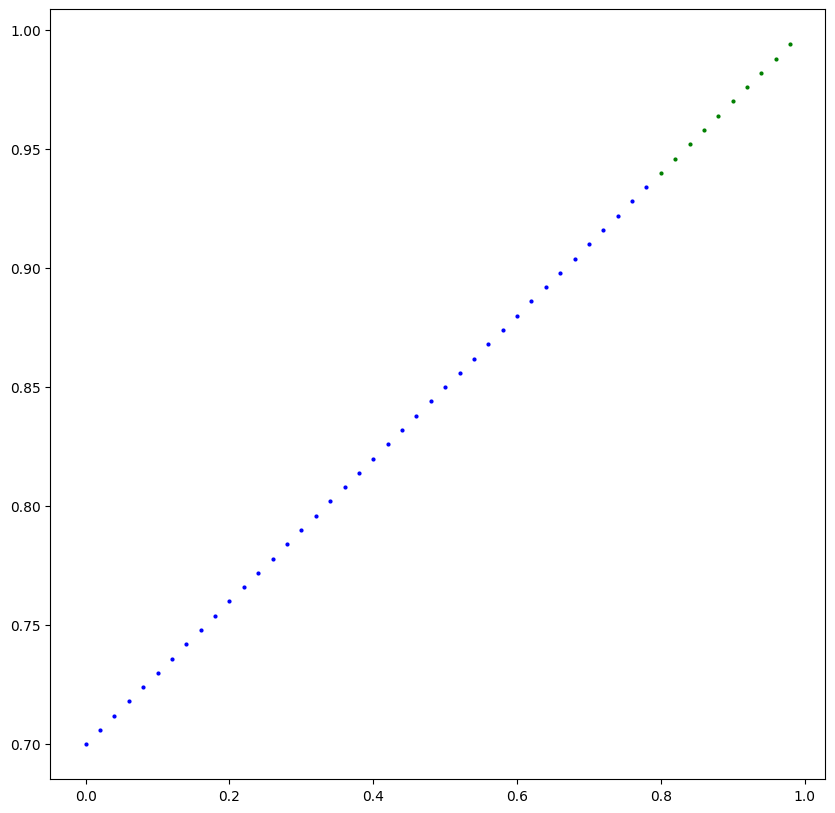

In [ ]:
plot_prediction()

## Build Model

We'll build model with the help of OOP in Python, inheriting the nn.Module as parent class in our Model class.

### `nn.Module`

`nn.Module` is **the base class for all neural network models and layers in PyTorch.** Think of it like the **boss blueprint** that every layer or whole model inherits from to get their swag on.


What this model does:

* Starts with random values (weights & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights & bias values we used to create the data)

How does it do so?

Through two main algorithms:

1. Gradient descent
2. Backpropagation

In [ ]:
# create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                                requires_grad=True, # default is True
                                                dtype=torch.float32))

        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))

        # forward method to define the computation in the model

    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
        return self.weight + x * self.bias

###  Difference between `torch.rand()` and `torch.randn()`

| Function        | Distribution Used                | Range of Values                          |
|----------------|----------------------------------|------------------------------------------|
| `torch.rand()`  | Uniform distribution             | Between **0 and 1**                      |
| `torch.randn()` | Normal distribution (μ = 0, σ = 1) | Can be **negative or positive**, bell-shaped |

---

💡 **Note:**  
- `rand()` is like throwing darts evenly across a wall — values spread flat.  
- `randn()` is like dropping weights on a trampoline — most land near the center (0), few hit the edges.

Use `randn()` when you want values centered around zero — perfect for initializing neural network weights!


### PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computational graphs (neural networks)
* `torch.nn.Parameter` - what parameter should our model try and learn
* `torch.nn.Module` - The base class for all neural networks, if you inherit it, you should overwrite `forward()` method
* `torch.optim` - this is where the optimizers in PyTorch live, they will help with gradient descent
* `torch.utils.data.Dataset` - Represents a map between key (label) and sample (features) pairs of your data, such as images and their associated labels
* `torch.utils.data.DataLoader` - Creates a Python over a torch dataset (allows you to iterate over your data)

### Checking the content of our PyTorch model



In [ ]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()

# check out the parameters
print(list(model_0.parameters()))


[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run through the `forward()` method.


In [ ]:
# input and its ideal output
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9400],
         [0.9460],
         [0.9520],
         [0.9580],
         [0.9640],
         [0.9700],
         [0.9760],
         [0.9820],
         [0.9880],
         [0.9940]]))

In [ ]:
with torch.inference_mode(): # turn off gradient tracking while testing the model
    y_preds = model_0(x_test)  # same as -> model_0.forward(x_test)

y_preds # values predicted by our model based on x_test as input

tensor([[0.4397],
        [0.4423],
        [0.4449],
        [0.4475],
        [0.4500],
        [0.4526],
        [0.4552],
        [0.4578],
        [0.4603],
        [0.4629]])

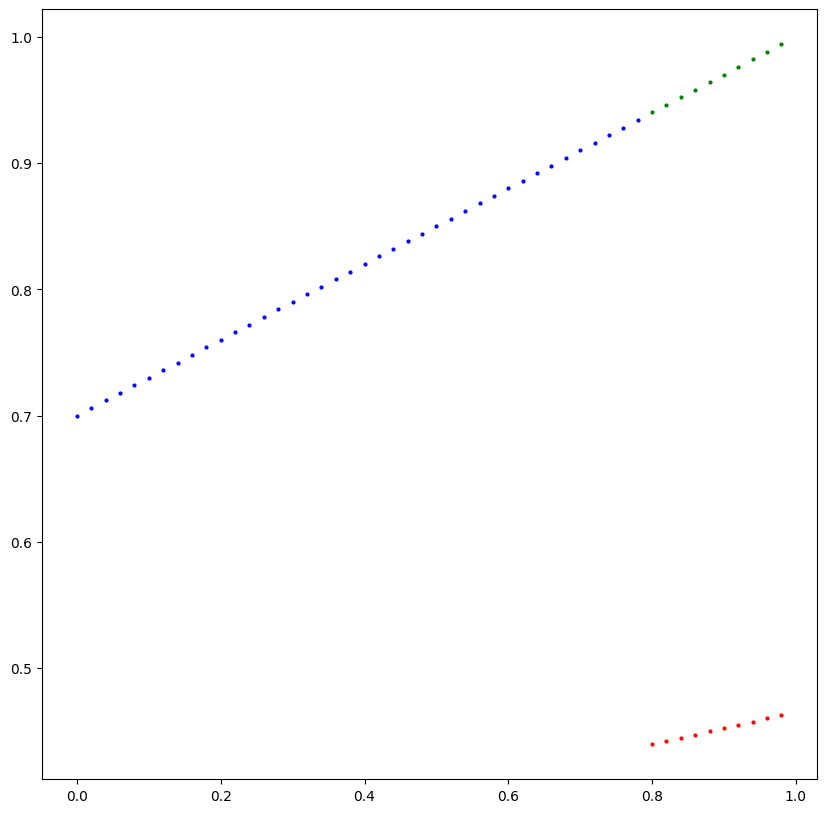

In [ ]:
# visualize our prediction
plot_prediction(prediction=y_preds)

### Train the model

The whole idea of training is for a model to move from **unknown** parameters (may be random) to some **known** parameters.

In other words, from poor representation of the data to the better representation of the data.

One way to measure how poor or how wrong your model's prediction are to use a loss function.

* Note: Loss function be called as cost function or criterion function in different areas.

Thhings we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account of loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve loss function.
    * Inside the optimizer, you'll often have to set two parameters:
        * `params` - The model parameter that you would like to optimize.
        * `lr (learning rate)` - Learning rate is a hyperparameter that defines how big/small optimizer chnages the parameter with each step (a small `lr` results in small changes, a large `lr` results in large changes)

For PyTorch we need:

* A training loop
* A testing loop

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setup a loss function
loss_fn = nn.L1Loss() # creating an instance of L1Loss class

# setup an optimizer (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(), # torch.optim.SGD -> also a class
                            lr=0.01) # learning rate = possible the most important hyperparameter you can set

# optimizer is instance of torch.optim.SGD class

### Building a training loop (and testing loop) in PyTorch

Couple of things we need in training loop:
0. Look through the data.
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called as forward propagation
2. Calculate the loss (compare forward pass prediction to ground labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parametes to try and improve the loss (**gradient descent**)

Epoch: 0 | Loss: 0.43007391691207886 | Test loss: 0.5021982789039612
OrderedDict([('weight', tensor([0.3467])), ('bias', tensor([0.1327]))])
Epoch: 10 | Loss: 0.31486400961875916 | Test loss: 0.367488294839859
OrderedDict([('weight', tensor([0.4467])), ('bias', tensor([0.1717]))])
Epoch: 20 | Loss: 0.19965408742427826 | Test loss: 0.23277834057807922
OrderedDict([('weight', tensor([0.5467])), ('bias', tensor([0.2107]))])
Epoch: 30 | Loss: 0.08444416522979736 | Test loss: 0.09806839376688004
OrderedDict([('weight', tensor([0.6467])), ('bias', tensor([0.2497]))])
Epoch: 40 | Loss: 0.004109492991119623 | Test loss: 0.009033465757966042
OrderedDict([('weight', tensor([0.7077])), ('bias', tensor([0.2812]))])
Epoch: 50 | Loss: 0.0031431943643838167 | Test loss: 0.007977604866027832
OrderedDict([('weight', tensor([0.7087])), ('bias', tensor([0.2992]))])
Epoch: 60 | Loss: 0.0031431943643838167 | Test loss: 0.007977604866027832
OrderedDict([('weight', tensor([0.7087])), ('bias', tensor([0.2992]

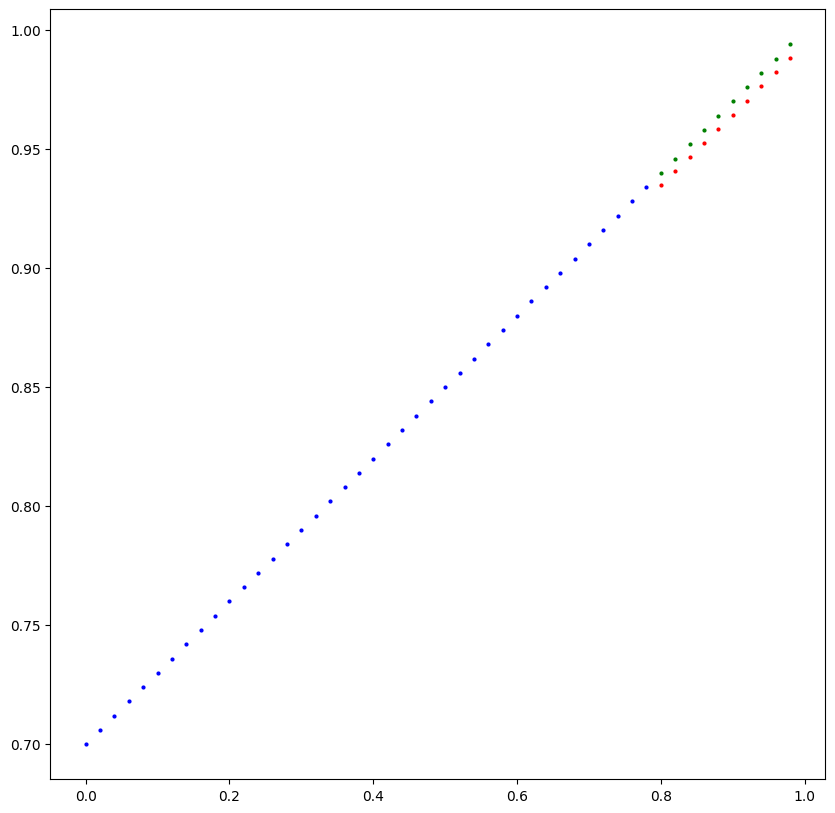

In [ ]:
# An epoch is one loop through the data. (a hyperparameter)
epochs = 100

# track different values

epoch_count = []
loss_values = []
test_loss_values = []

# 0. loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(x_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()

    # by default how the optimizer chnages will accumulate through the loop
    # so we have to zero them as we did in step-3

    # testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing

    with torch.inference_mode():
        # 1. do the forward pass
        y_preds = model_0(x_test)

        # 2. calculate the loss
        test_loss = loss_fn(y_preds, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

        # print the model_0 parameters
        print(model_0.state_dict())

plot_prediction(prediction=y_preds)


# Optimizer, Backpropagation, and optimizer.step() — Explained Simply

- **Backpropagation** is like the blame game.  
  After your model makes a prediction, backpropagation goes backward through the model and figures out how much each parameter (weight or bias) messed up by calculating **gradients**.

- **Optimizer** is like the peon ready to fix the model.  
  It uses the gradients from backpropagation to plan how to adjust the weights and biases to make the model better.

- **`optimizer.step()`** is the peon's hand that actually makes the move.  
  Without calling `.step()`, the optimizer just has a plan but doesn't apply any changes.  
  Calling `.step()` **updates** the parameters based on the gradients.

---

### The flow looks like this:

1. Model predicts (forward pass).  
2. Calculate how wrong the prediction was (loss).  
3. Backpropagation computes gradients (blames parameters).  
4. Optimizer plans how to fix weights using gradients.  
5. `optimizer.step()` applies those fixes.  
6. Repeat many times (epochs) to improve the model.

---

Think of it like:

- Optimizer = the peon ready to work.  
- `optimizer.step()` = the peon's hand that moves the bricks.

Without the hand moving, all the planning is useless!

---

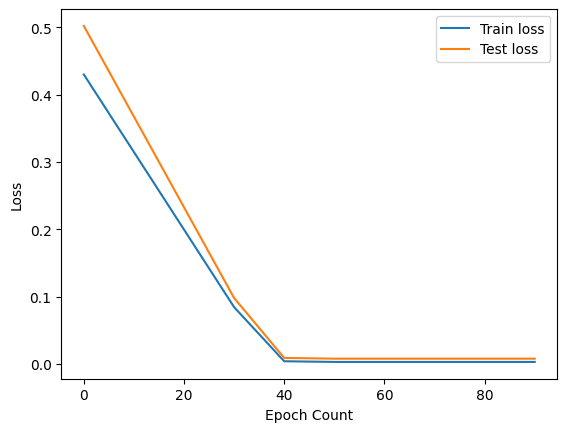

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test loss")
plt.xlabel("Epoch Count")
plt.ylabel("Loss")
plt.legend()

## Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format.
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary.

In [ ]:
# saving our pytorch model
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create a model save path
MODEL_NAME = "pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict (recommeded way)
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # object to save
           f = MODEL_SAVE_PATH) # path

Saving model to: models/pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that model.

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6987])), ('bias', tensor([0.2953]))])

In [ ]:
# to load in a saved state_dict(), we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6987])), ('bias', tensor([0.2953]))])